# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name:  
Created by NAMES (SJSU IDs): May Sabai (017390438), Jerry Nguyen (016437330), Anusri Nagarajan (017743700), Aldo Barrientos Calero (009890296)
Last updated: 10/12/2025  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.

We do have null values so we replace them with 'NaN' and drop the last empty column.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

renter_affordability = pd.read_csv('/content/drive/MyDrive/project/data/renter_affordability_data - 2023.csv')
renter_affordability

Mounted at /content/drive


,RegionID,SizeRank,CityName,StateName,abb_StateName,Average Affordability,Population,Minimum Wage,Renter Income,State income tax,State property tax,Median Income
0,394388,51,Birmingham,Alabama,AL,0.227831,196818.0,7.25,52619.50969,NaN,0.0036,44376.0
1,394698,114,Huntsville,Alabama,AL,0.195576,226228.0,7.25,55365.67706,NaN,0.0036,70778.0
2,394870,127,Mobile,Alabama,AL,0.258713,201920.0,7.25,47740.49434,NaN,0.0036,51090.0
3,394875,143,Montgomery,Alabama,AL,0.237828,196107.0,7.25,49439.14181,NaN,0.0036,55687.0
4,395171,188,Tuscaloosa,Alabama,AL,0.285725,113016.0,7.25,55426.68060,NaN,0.0036,48536.0
...,...,...,...,...,...,...,...,...,...,...,...,...
384,394756,311,La Crosse,Wisconsin,WI,0.177210,51283.0,7.25,42124.53685,NaN,0.0125,53803.0
385,395089,352,Sheboygan,Wisconsin,WI,0.173060,49614.0,7.25,42051.68461,NaN,0.0125,62953.0
386,394599,381,Fond du Lac,Wisconsin,WI,0.157113,44381.0,7.25,37335.63819,NaN,0.0125,61620.0
387,394462,391,Cheyenne,Wyoming,WY,0.195065,65287.0,7.25,48837.50061,NaN,0.0055,77176.0


In [3]:
!pwd
!ls sample_data/


/content
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [4]:
renter_affordability= renter_affordability.drop('State income tax', axis=1)

In [5]:
renter_affordability.isnull().sum()

,0
RegionID,0
SizeRank,0
CityName,0
StateName,0
abb_StateName,0
Average Affordability,10
Population,9
Minimum Wage,0
Renter Income,10
State property tax,0


In [6]:
renter_affordability = renter_affordability.dropna(subset=['Median Income', 'Renter Income', 'Population', 'Average Affordability'])
renter_affordability

,RegionID,SizeRank,CityName,StateName,abb_StateName,Average Affordability,Population,Minimum Wage,Renter Income,State property tax,Median Income
0,394388,51,Birmingham,Alabama,AL,0.227831,196818.0,7.25,52619.50969,0.0036,44376.0
1,394698,114,Huntsville,Alabama,AL,0.195576,226228.0,7.25,55365.67706,0.0036,70778.0
2,394870,127,Mobile,Alabama,AL,0.258713,201920.0,7.25,47740.49434,0.0036,51090.0
3,394875,143,Montgomery,Alabama,AL,0.237828,196107.0,7.25,49439.14181,0.0036,55687.0
4,395171,188,Tuscaloosa,Alabama,AL,0.285725,113016.0,7.25,55426.68060,0.0036,48536.0
...,...,...,...,...,...,...,...,...,...,...,...
384,394756,311,La Crosse,Wisconsin,WI,0.177210,51283.0,7.25,42124.53685,0.0125,53803.0
385,395089,352,Sheboygan,Wisconsin,WI,0.173060,49614.0,7.25,42051.68461,0.0125,62953.0
386,394599,381,Fond du Lac,Wisconsin,WI,0.157113,44381.0,7.25,37335.63819,0.0125,61620.0
387,394462,391,Cheyenne,Wyoming,WY,0.195065,65287.0,7.25,48837.50061,0.0055,77176.0


In [7]:
renter_affordability.isnull().sum()

,0
RegionID,0
SizeRank,0
CityName,0
StateName,0
abb_StateName,0
Average Affordability,0
Population,0
Minimum Wage,0
Renter Income,0
State property tax,0


### Q2: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module

In [8]:
renter_affordability_copy = renter_affordability.copy()

renter_affordability_copy['Income difference'] = renter_affordability_copy['Renter Income'] - renter_affordability_copy['Median Income']

renter_affordability_copy

,RegionID,SizeRank,CityName,StateName,abb_StateName,Average Affordability,Population,Minimum Wage,Renter Income,State property tax,Median Income,Income difference
0,394388,51,Birmingham,Alabama,AL,0.227831,196818.0,7.25,52619.50969,0.0036,44376.0,8243.50969
1,394698,114,Huntsville,Alabama,AL,0.195576,226228.0,7.25,55365.67706,0.0036,70778.0,-15412.32294
2,394870,127,Mobile,Alabama,AL,0.258713,201920.0,7.25,47740.49434,0.0036,51090.0,-3349.50566
3,394875,143,Montgomery,Alabama,AL,0.237828,196107.0,7.25,49439.14181,0.0036,55687.0,-6247.85819
4,395171,188,Tuscaloosa,Alabama,AL,0.285725,113016.0,7.25,55426.68060,0.0036,48536.0,6890.68060
...,...,...,...,...,...,...,...,...,...,...,...,...
384,394756,311,La Crosse,Wisconsin,WI,0.177210,51283.0,7.25,42124.53685,0.0125,53803.0,-11678.46315
385,395089,352,Sheboygan,Wisconsin,WI,0.173060,49614.0,7.25,42051.68461,0.0125,62953.0,-20901.31539
386,394599,381,Fond du Lac,Wisconsin,WI,0.157113,44381.0,7.25,37335.63819,0.0125,61620.0,-24284.36181
387,394462,391,Cheyenne,Wyoming,WY,0.195065,65287.0,7.25,48837.50061,0.0055,77176.0,-28338.49939


<Figure size 1000x600 with 0 Axes>

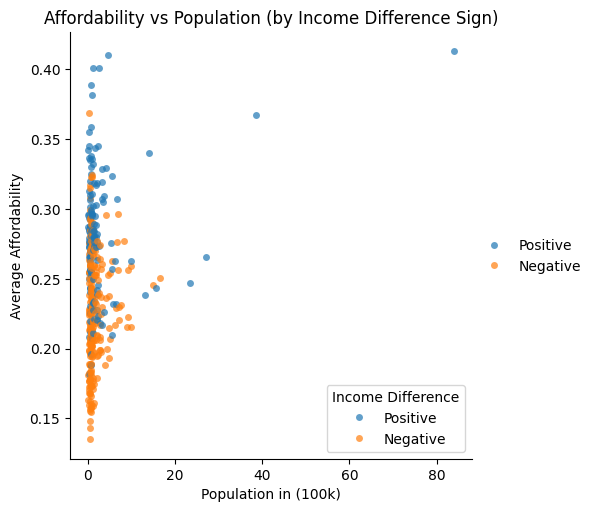

In [9]:
plt.figure(figsize=(10,6))

sns.catplot(
    data=renter_affordability_copy,
    x=renter_affordability_copy['Population']/100000,
    y='Average Affordability',
    hue=np.where(renter_affordability_copy['Income difference'] >= 0, 'Positive', 'Negative'),
    alpha=0.7,
    native_scale=True,
)

plt.title('Affordability vs Population (by Income Difference Sign)')
plt.xlabel('Population in (100k)')
plt.ylabel('Average Affordability')
plt.legend(title='Income Difference')
plt.show()

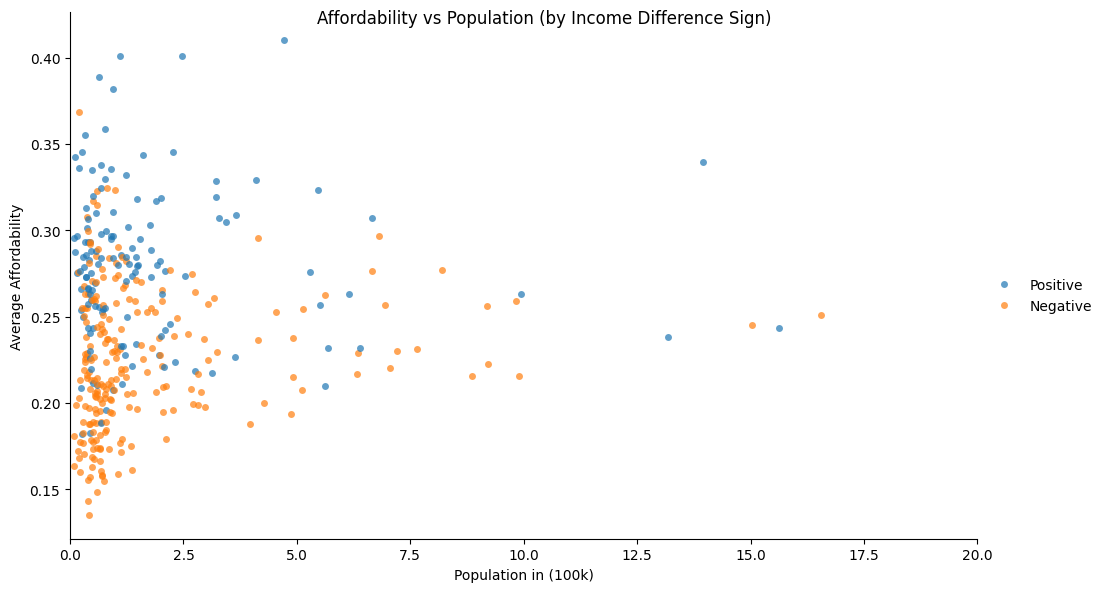

In [10]:
g = sns.catplot(
    data=renter_affordability_copy,
    x=renter_affordability_copy['Population']/100000,
    y='Average Affordability',
    hue=np.where(renter_affordability_copy['Income difference'] >= 0, 'Positive', 'Negative'),
    alpha=0.7,
    native_scale=True,
    height=6,
    aspect=1.67
)

g.set(xlim=(0, 20))  # Set x-axis range from 0 to 20
g.set_axis_labels('Population in (100k)', 'Average Affordability')
g.fig.suptitle('Affordability vs Population (by Income Difference Sign)')

plt.show()

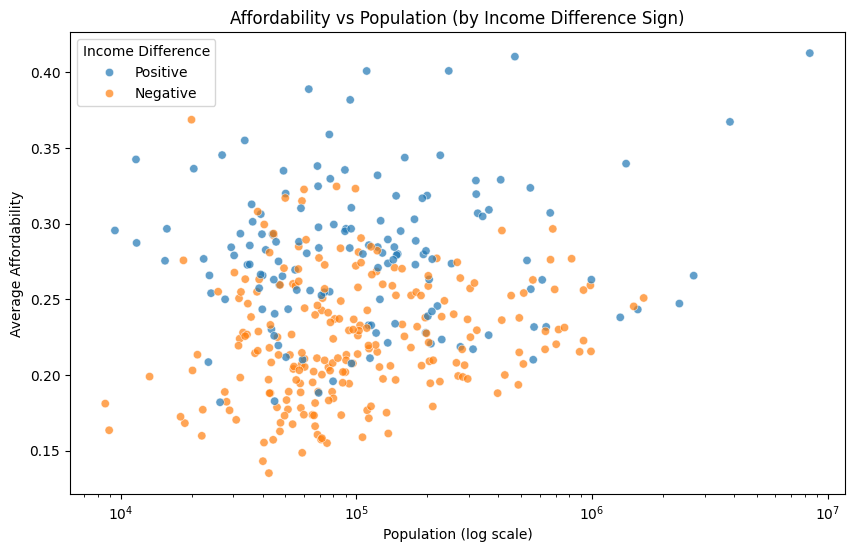

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=renter_affordability_copy,
    x='Population',
    y='Average Affordability',
    hue=np.where(renter_affordability_copy['Income difference'] >= 0, 'Positive', 'Negative'),
    alpha=0.7
)

plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Affordability vs Population (by Income Difference Sign)')
plt.xlabel('Population (log scale)')
plt.ylabel('Average Affordability')
plt.legend(title='Income Difference')
plt.show()

The plot shows no clear relationship between population size and affordability.

Positive income difference means renters earn more than the median household income, while negative means they earn less.

The key finding is that areas with higher affordability (above 30% of income) **need renters to earn above the median income**. This suggests that even when renters earn more than average, they still face high housing costs. In contrast, areas with lower affordability burdens show a more even mix of income levels.

### Q3: Come up with a another unique question. This question must use map() or apply()

In [11]:
# Your code here . . .
median_affordability = renter_affordability_copy['Average Affordability'].median()

renter_affordability_copy['Income Difference Percentage'] = renter_affordability_copy.apply(
    lambda row: ((row['Renter Income'] - row['Median Income']) / row['Median Income']) * 100 if row['Median Income'] != 0 else 0,
    axis=1
)

renter_affordability_copy['Combined Category'] = renter_affordability_copy.apply(
    lambda row: f"{'Above Median Affordability' if row['Average Affordability'] >= median_affordability else 'Below Median Affordability'} and {'Positive Income Difference' if row['Income Difference Percentage'] >= 0 else 'Negative Income Difference'}",
    axis=1
)

display(renter_affordability_copy[['Average Affordability', 'Income Difference Percentage', 'Combined Category']].head(5))
print("\nValue counts for the Combined Category:")
display(renter_affordability_copy['Combined Category'].value_counts())

,Average Affordability,Income Difference Percentage,Combined Category
0,0.227831,18.576505,Below Median Affordability and Positive Income...
1,0.195576,-21.775584,Below Median Affordability and Negative Income...
2,0.258713,-6.556089,Above Median Affordability and Negative Income...
3,0.237828,-11.219599,Below Median Affordability and Negative Income...
4,0.285725,14.197051,Above Median Affordability and Positive Income...



Value counts for the Combined Category:


,count
Combined Category,
Below Median Affordability and Negative Income Difference,154
Above Median Affordability and Positive Income Difference,110
Above Median Affordability and Negative Income Difference,75
Below Median Affordability and Positive Income Difference,30


Cities can be categorized by comparing their Average Affordability to the overall median, splitting them into above and below median. A lower average affordability percentage indicates that a city is more affordable and a higher percentage indicates it's less affordable. Then, calculating how each city's Renter Income differs from its Median Income as a percentage, we can create four unique groups based on whether affordability is above or below the median and whether the income percentage is positive or negative.

The cities are distributed as such (in order of best to worst):
*   "Below Median Affordability and Positive Income Difference" with 30 cities. Housing is more affordable than the median and renters on average earn more than the median household income in the city.
*   "Below Median Affordability and Negative Income Difference" with 154 cities. Housing is more affordable than the median but renters on average earn less than the median household income in the city.
*   "Above Median Affordability and Positive Income Difference" with 110 cities. Renters on average earn more than the median household income but housing is less affordable than the median.
*   "Above Median Affordability and Negative Income Difference" with 75 cities. Housing is less affordable than the median and renters on average earn less than the median household income in the city.


This distribution shows that cities with higher affordability are more likely to have renters that earn below the median income. On the other hand, cities with lower affordability have a higher conecntration of renters that earn above the median income. There are still a significant number of cities where renters actually earn below the median, conveying the issue of affordability in many cities, even for ones with higher incomes.

### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

In [ ]:
# Your code here . . .

## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?

Additional Datasets: Median Household value, Cost of living, job opportunity / employment reate, crime rate

Psuedocode:

# Step 1: Start with the main renter affordability dataset
Load renter_affordability_data

# Step 2: Load the additional complementary datasets
Load median_house_value_data
Load cost_of_living_data
Load employment_rate_data
Load crime_rate_data

# Step 3: Clean and standardize each dataset
- Make sure each dataset has the same column names for City and State
- Remove any duplicate or irrelevant columns
- Handle missing values (replace or remove if necessary)

# Step 4: Merge datasets together using City and State as keys
- Merge renter_affordability_data with median_house_value_data on City and State
- Merge the result with cost_of_living_data on City and State
- Merge the result with employment_rate_data on City and State
- Merge the result with crime_rate_data on City and State

# Step 5: Check the combined dataset
- Verify that all cities and states are correctly aligned
- Check for null values or mismatched rows after merging
- If needed, fill missing data with averages or zeros

# Step 6: Reshape or aggregate data if needed
- If data includes multiple years, group or average by City and State
- If data is in wide format, use melt or pivot to make it long format for visualization

# Step 7: Save or visualize the merged dataset
- Save the cleaned and merged dataset to a new CSV file
- Use it to create new plots showing how affordability relates to
  house value, cost of living, employment rate, and crime rate